# PRACTICA N°8

##### **TEMA:** _ NAIVE BAYES Y ÁRBOLES DE DECISIÓN_

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

##### **OBJETIVOS:** 
+ Analizar un dataset mediante algoritmos de aprendizaje supervisado para crear un modelo de clasificación.
+ Familiarizarse con el uso de phyton para realizar el análisis de un dataset aplicando las librerías de modelado de datos.
+ Aplicar métodos de Python para el modelado de datos, basados en Naive-Bayes y Árboles de decisión.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv("DatosCancer.csv")

## **Análisis general:** 

Determinar el **tamaño** del dataset (Número de Registros y número de variables).

In [3]:
df.shape

(525, 11)

Determinar el **tipo de dato** de cada una de las variables del dataset.

In [5]:
df.dtypes

Unnamed: 0             int64
Espesor-Tumor          int64
Tamanio_Uniformidad    int64
Forma_Uniformidad      int64
Adhesion               int64
Tamaño_Epitelial       int64
Nucleo                 int64
Cromatina_Blanda       int64
Nucleolos_Normales     int64
Mitosis                int64
Clase                  int64
dtype: object

Verificar si existen **datos faltantes** en el dataset. 

In [7]:
datos_faltantes=df.isnull()
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print(datos_faltantes[column].value_counts())
    print("")

Unnamed: 0
False    525
Name: Unnamed: 0, dtype: int64

Espesor-Tumor
False    525
Name: Espesor-Tumor, dtype: int64

Tamanio_Uniformidad
False    525
Name: Tamanio_Uniformidad, dtype: int64

Forma_Uniformidad
False    525
Name: Forma_Uniformidad, dtype: int64

Adhesion
False    525
Name: Adhesion, dtype: int64

Tamaño_Epitelial
False    525
Name: Tamaño_Epitelial, dtype: int64

Nucleo
False    525
Name: Nucleo, dtype: int64

Cromatina_Blanda
False    525
Name: Cromatina_Blanda, dtype: int64

Nucleolos_Normales
False    525
Name: Nucleolos_Normales, dtype: int64

Mitosis
False    525
Name: Mitosis, dtype: int64

Clase
False    525
Name: Clase, dtype: int64



 Determinar la **correlación** entre las variables del dataset.

In [9]:
df.corr()

,Unnamed: 0,Espesor-Tumor,Tamanio_Uniformidad,Forma_Uniformidad,Adhesion,Tamaño_Epitelial,Nucleo,Cromatina_Blanda,Nucleolos_Normales,Mitosis,Clase
Unnamed: 0,1.000000,-0.578912,-0.668794,-0.670718,-0.560660,-0.547380,-0.653996,-0.624927,-0.575237,-0.338810,0.823229
Espesor-Tumor,-0.578912,1.000000,0.639617,0.646653,0.474227,0.521095,0.575444,0.552861,0.537681,0.352912,-0.706864
Tamanio_Uniformidad,-0.668794,0.639617,1.000000,0.909176,0.715039,0.752172,0.683772,0.764121,0.711335,0.476448,-0.809226
Forma_Uniformidad,-0.670718,0.646653,0.909176,1.000000,0.695451,0.715744,0.716086,0.737721,0.699798,0.454818,-0.813877
Adhesion,-0.560660,0.474227,0.715039,0.695451,1.000000,0.584046,0.648329,0.666370,0.631791,0.411031,-0.690956
Tamaño_Epitelial,-0.547380,0.521095,0.752172,0.715744,0.584046,1.000000,0.584595,0.612840,0.620295,0.469371,-0.677947
Nucleo,-0.653996,0.575444,0.683772,0.716086,0.648329,0.584595,1.000000,0.702069,0.576891,0.342451,-0.803681
Cromatina_Blanda,-0.624927,0.552861,0.764121,0.737721,0.666370,0.612840,0.702069,1.000000,0.665065,0.364205,-0.775519
Nucleolos_Normales,-0.575237,0.537681,0.711335,0.699798,0.631791,0.620295,0.576891,0.665065,1.000000,0.453178,-0.714188
Mitosis,-0.338810,0.352912,0.476448,0.454818,0.411031,0.469371,0.342451,0.364205,0.453178,1.000000,-0.417426


Modificar el **tipo de dato** de las variables de entrada que considere necesario.

In [11]:
df.head()

,Unnamed: 0,Espesor-Tumor,Tamanio_Uniformidad,Forma_Uniformidad,Adhesion,Tamaño_Epitelial,Nucleo,Cromatina_Blanda,Nucleolos_Normales,Mitosis,Clase
0,0,9,10,10,1,10,8,3,3,1,0
1,1,5,8,8,8,5,10,7,8,1,0
2,2,10,2,2,1,2,6,1,1,2,0
3,3,6,10,10,2,8,10,7,3,3,0
4,4,10,9,8,7,6,4,7,10,3,0


Graficar la distribución de los datos de las variables de entrada, utilizando la gráfica de **histograma**

In [14]:
import matplotlib.pyplot as plt

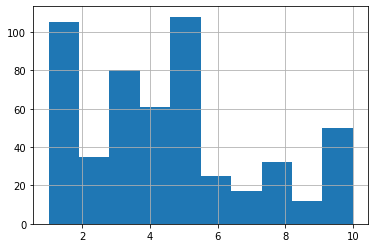

In [15]:
df["Espesor-Tumor"].hist()
plt.show()


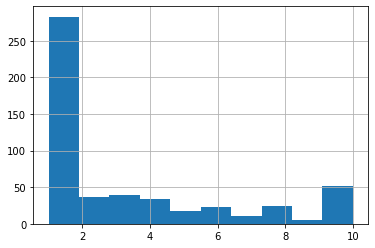

In [16]:
df["Tamanio_Uniformidad"].hist()
plt.show()


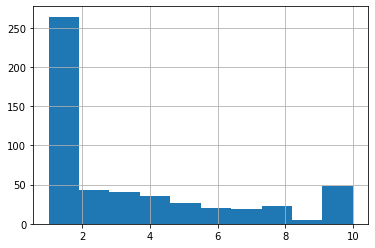

In [17]:
df["Forma_Uniformidad"].hist()
plt.show()


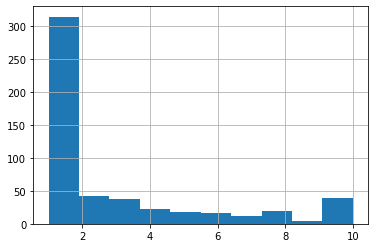

In [18]:
df["Adhesion"].hist()
plt.show()


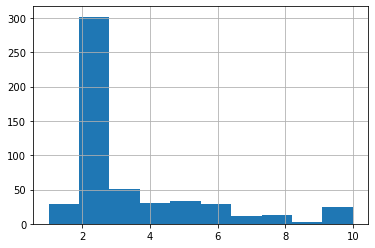

In [19]:
df["Tamaño_Epitelial"].hist()
plt.show()


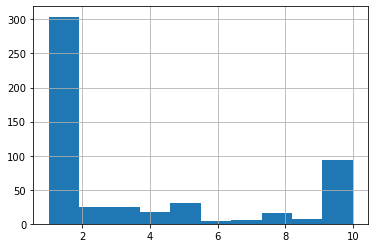

In [20]:
df["Nucleo"].hist()
plt.show()


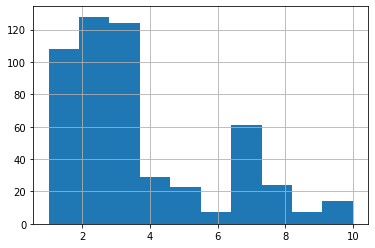

In [21]:
df["Cromatina_Blanda"].hist()
plt.show()


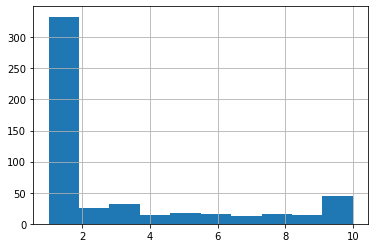

In [22]:
df["Nucleolos_Normales"].hist()
plt.show()


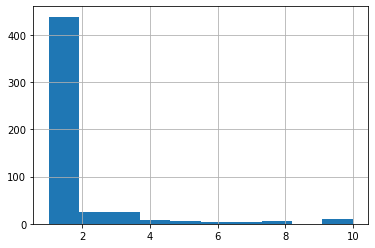

In [23]:
df["Mitosis"].hist()
plt.show()


 ## **Modelo de Clasificación con Árboles de Decisión**

Obtenga el modelo de clasificación para el dataset con los métodos apropiados. Utilice todas las variables de entrada.

In [26]:
#Definir las variables
x=np.asarray(df[["Espesor-Tumor","Tamanio_Uniformidad","Forma_Uniformidad","Adhesion","Tamaño_Epitelial","Nucleo","Cromatina_Blanda","Nucleolos_Normales"]])
y=np.asarray(df["Clase"])

In [27]:
#Dividir el dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#Definimos un objeto
AD=DecisionTreeClassifier(criterion="entropy",max_depth=4)
AD

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
#Ajustar o entrenar 
AD.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
#Obtener la hipotesis o predicciones
predicciones=AD.predict(xtest)

Evalúe el modelo obtenido con las **métricas** que considere pertinentes.

In [32]:
from sklearn.metrics import accuracy_score, precision_score

In [61]:
acc=accuracy_score(predicciones,ytest)
print("la exactitud del modelo es: \n",acc)
pre=precision_score(ytest,predicciones)
print("la precision del clasificador es: \n ", pre)

la exactitud del modelo es: 
 0.8987341772151899
la precision del clasificador es: 
  0.9662921348314607


Aplique **PCA** para disminuir el número de variables de entrada.

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
#Crear la nueva variable de entrada normalizada
x_se=StandardScaler().fit_transform(x)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
#Instanciamos el objeto PCA y definimos 6 componentes principales
pca=PCA(n_components=6)

In [39]:
#Obtener componentes principales
pca.fit(x_se)
#X_pca tien las componenete principales
X_pca=pca.transform(x_se)

Obtenga nuevamente el modelo de Clasificación y evalúe con las **métricas** que considere pertinentes.

In [41]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X_pca,y,test_size=0.3,random_state=3)

In [42]:
#Definimos un objeto
AD1=DecisionTreeClassifier(criterion="entropy",max_depth=4)
AD1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
#Ajustar o entrenar 
AD1.fit(xtrain1,ytrain1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
#Obtener la hipotesis o predicciones
predicciones1=AD1.predict(xtest1)

In [62]:
acc1=accuracy_score(predicciones1,ytest1)
print("la exactitud del modelo es: \n ",acc1)
pre1=precision_score(ytest1,predicciones1)
print("la precision del clasificador es: \n ", pre1)

la exactitud del modelo es: 
  0.9177215189873418
la precision del clasificador es: 
  0.9387755102040817


Realice una tabla comparativa con las métricas antes y después de aplicar **PCA**

* | sin PCA | con PCA
--|--|--
Exactitud| 0.8987341772151899 | 0.9177215189873418
Precision| 0.9662921348314607 | 0.9387755102040817

Obtenga el Esquema de Árbol de Decisión para el segundo modelo obtenido

In [47]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree

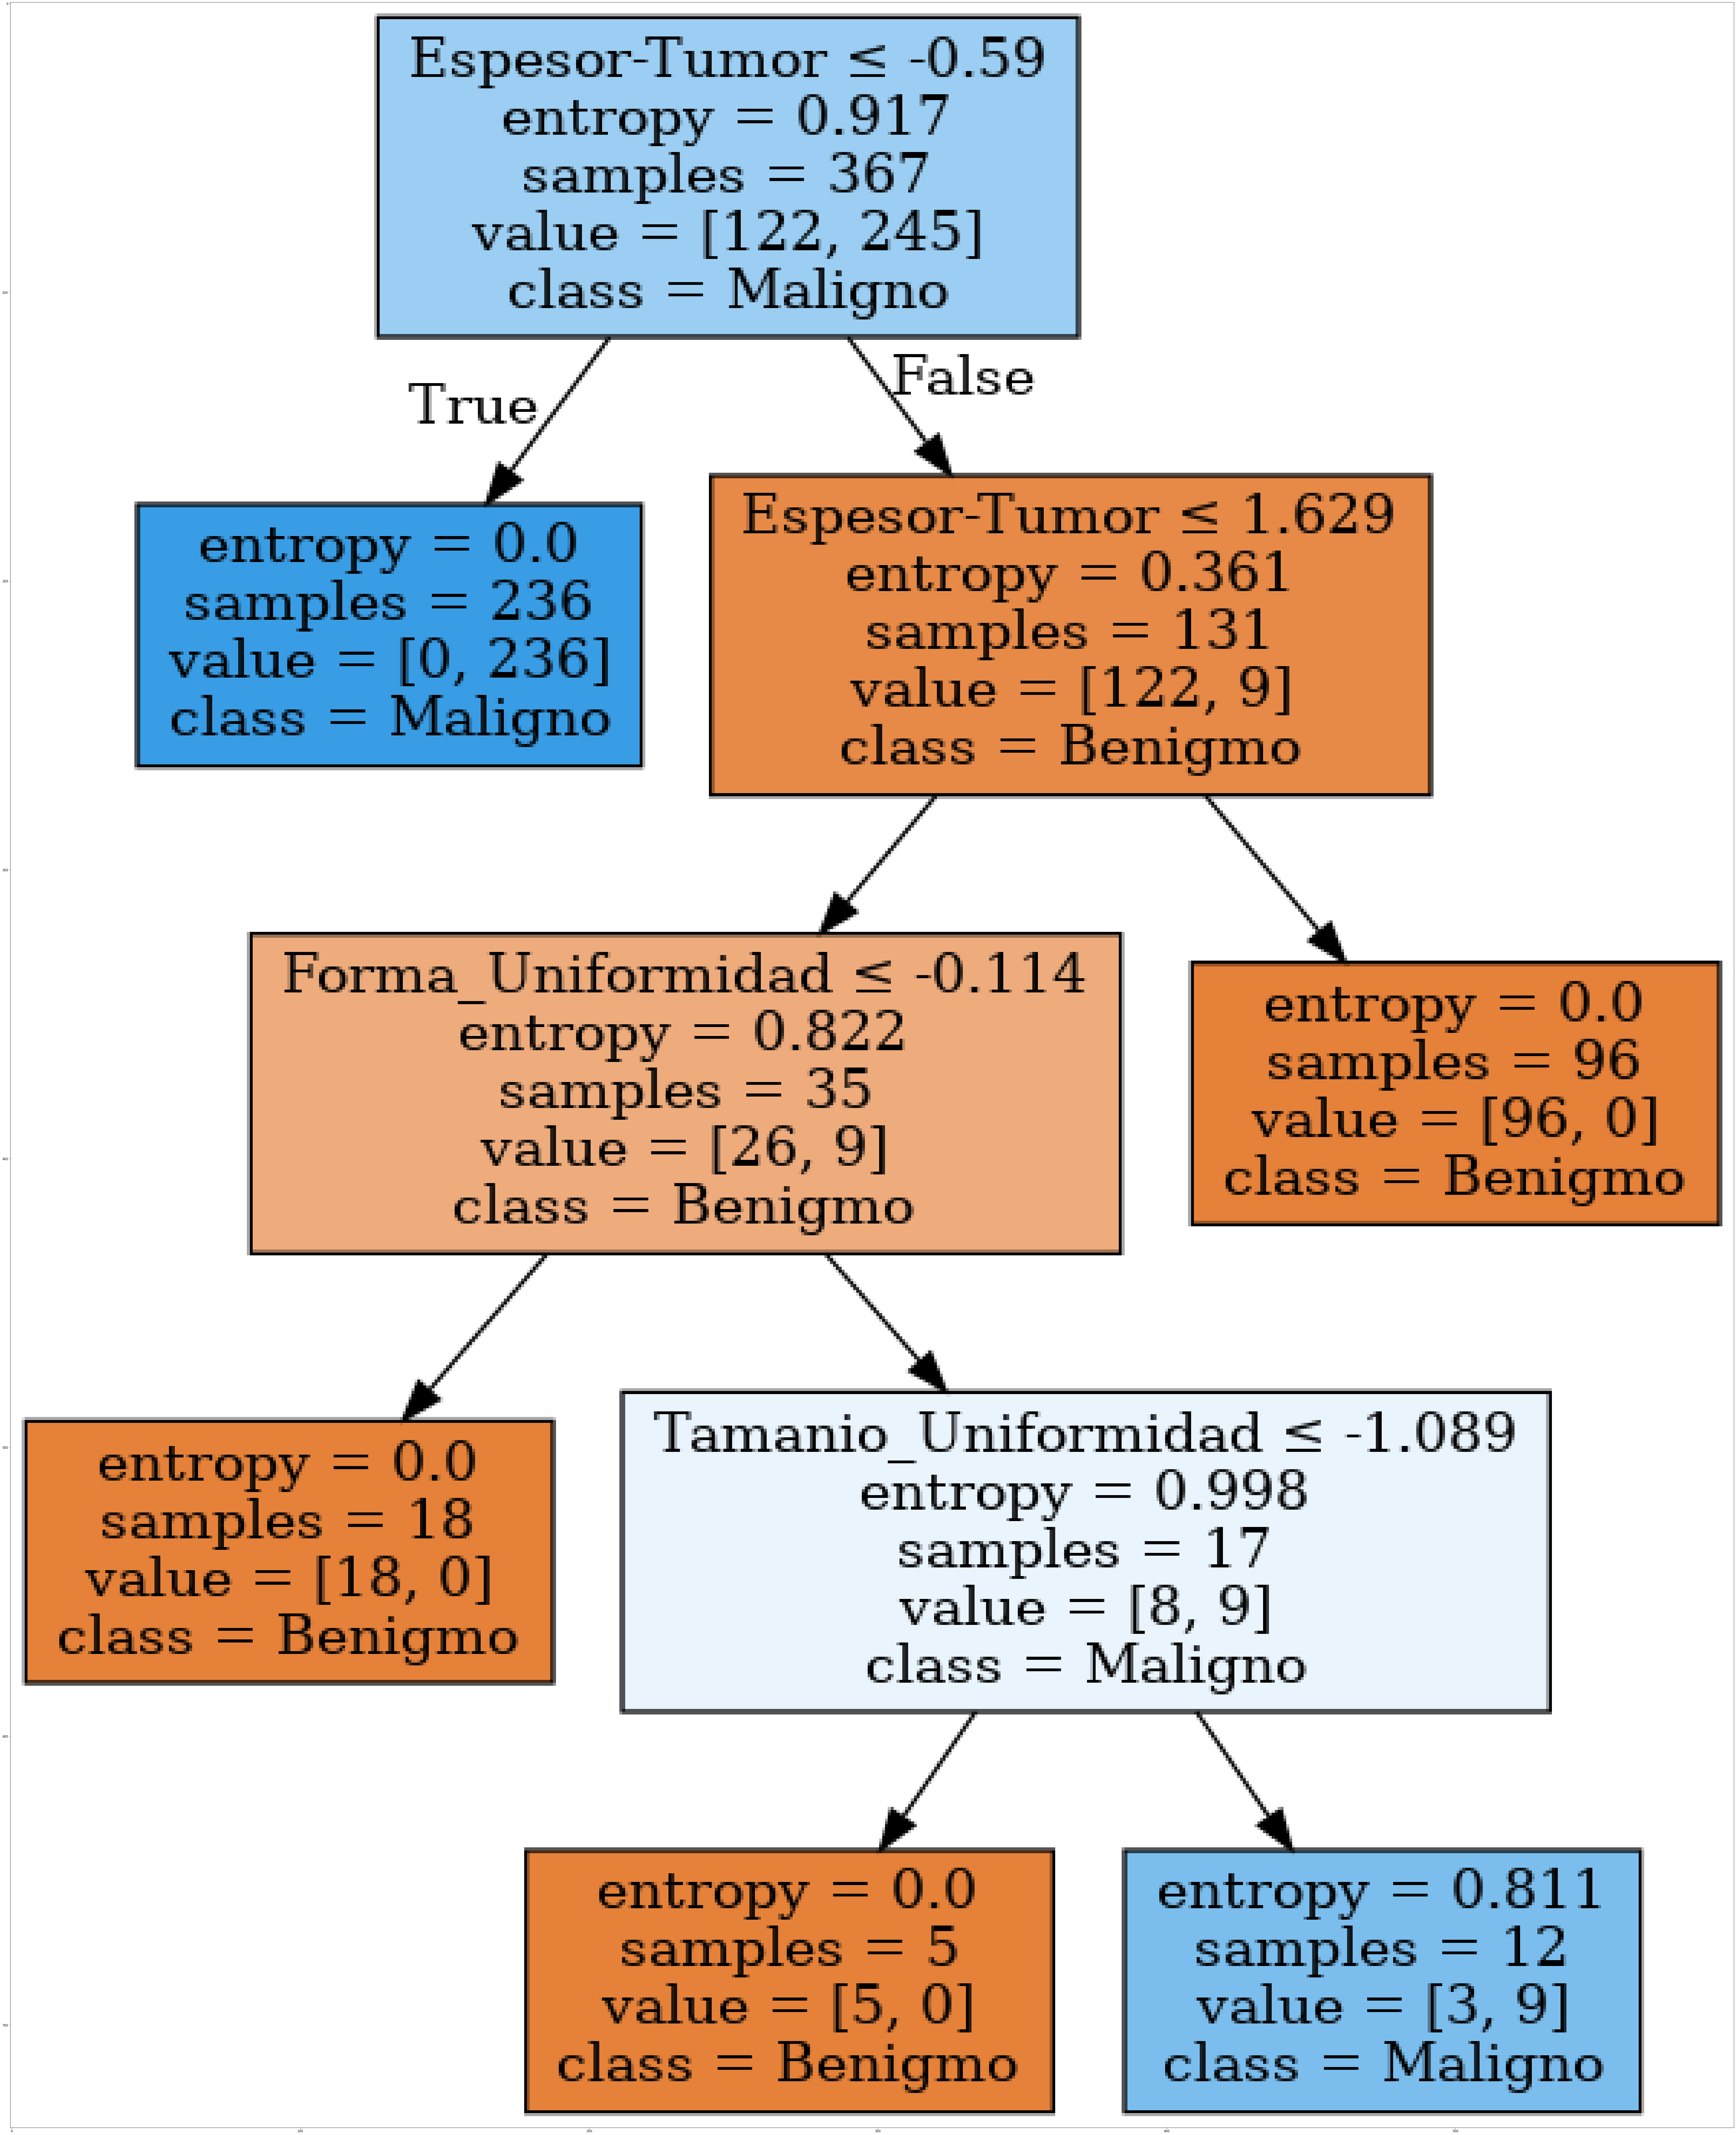

In [57]:
data=StringIO()
etiquetas=["Benigmo","Maligno"]
NombreArchivo="Arbol1.png"
nombre_variables=df.columns[1:7]
out=tree.export_graphviz(AD1,feature_names=nombre_variables,out_file=data,class_names=etiquetas,filled=True,special_characters=True,rotate=False)
graph=pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png(NombreArchivo)
img=mpimg.imread(NombreArchivo)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation="nearest")